# Requirements 
1. Image Enhancement
2. Segmentation
3. Text detector
4. Orintation challenge

# Each of the following section will do one of the requirements as Experiments


# Image Enhancement Experiments ( 10 Nov )
1. Input: Capture Image
2. Output: Enhancemented Image
3. Procedures:
 1. convert the Image to Grayscale
 2. Do all the known enhancement techniques(Gamma correction, Contrast Enhancement, Histogram Equalization)
 3. Removing noise
 3. Output all the Enhancement Images

In [7]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def contrast_enhancement(img):
    newimg=np.copy(img)
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            if (img[x][y]*255 <= 100):
                newimg[x][y]= (1.5 * img[x][y]*255 + 50)/255
            else :
                 newimg[x][y]= img[x][y] 
    return newimg

def gamma_correction(img,c,gamma):
    newimg=np.copy(img)
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            newimg[x][y]= c * (img[x][y] ** gamma) 
    return newimg

def histogram_equalization(img):
    newimg=np.copy(img)
    H = [0] * 256
    H_c = [0] * 256
    T = [0] * 256
    
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            img[x][y] = img[x][y] * 255
            
            
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            H[int(img[x][y])] +=1
    
    H_c[0] = H[0]
    
    for p in range(1,len(H)):
        H_c[p] = H_c[p-1] + H[p]
        
    for p in range(0,len(H)):
        T[p] = round(255 * (H_c[p]/(newimg.shape[0]*newimg.shape[1])))
    
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            newimg[x][y] = T[int(img[x][y])]
    
    return newimg


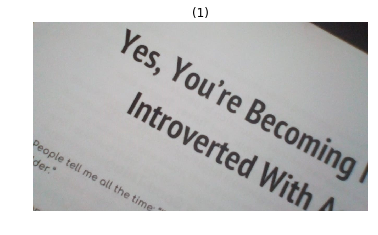

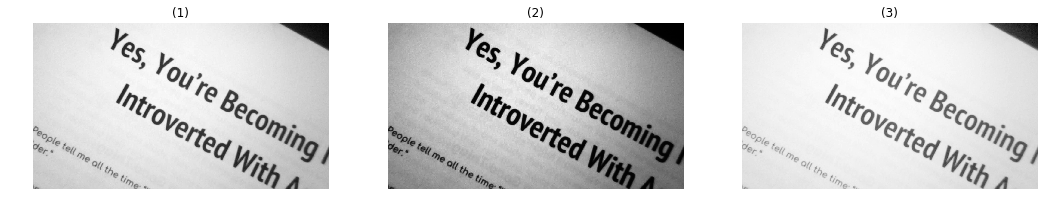

In [53]:
image = io.imread('Captured_images/oo_original.jpeg')
show_images([image])
gray=rgb2gray(image)

#contrast_transform = contrast_enhancement(gray)
#show_images([gray,contrast_transform])

gamma_correction_transform = gamma_correction(gray,1,3)
gamma_correction_transform2 = gamma_correction(gray,1,0.3)
show_images([gray,gamma_correction_transform,gamma_correction_transform2])


#histogram_equalization_image = histogram_equalization(gray)
#show_images([gray,histogram_equalization_image])
#showHist(gray)
#showHist(histogram_equalization_image)

# Thresholding Experiments


40.5


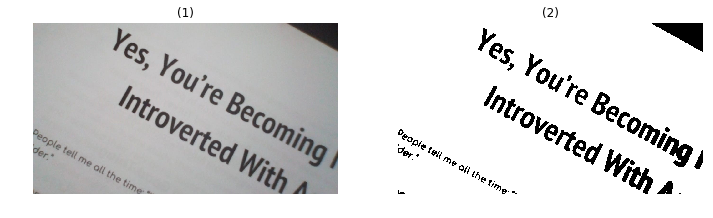

In [54]:
def get_threshold(image):
    img = np.copy(image)
    #img = rgb2gray(img)
    img *= 255
    img = img.astype('uint8')
    H = [0] * 256
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            H[int(img[x][y])] +=1
    suma = 0 
    for i in range(0,255):
        suma += i*H[i]
    Tinit = round( (suma) / (img.shape[0]*img.shape[1]))
    #print(img)
    #print(Tinit)
    threshold = Tinit
    threshold_old = 0
    cnt = 0
    while (threshold_old != threshold ):
        threshold_old = threshold
        suma1 = 0
        suma2 = 0
        for i in range(0,255):
            if H[i] < threshold_old:
                suma1 += i*H[i]
            else :
                suma2 += i*H[i]

        mean1 = round( (suma1) / (img.shape[0]*img.shape[1]))
        mean2 = round( (suma2) / (img.shape[0]*img.shape[1]))
        cnt +=1
        threshold = (mean1 + mean2) /2
    return threshold
    
    
def transform(image): 
    #image = rgb2gray(image)
    T = get_threshold(image)
    image *= 255
    image = image.astype('uint8')
    final = np.copy(image)
    print(T)
    for i in range(0,image.shape[0]):
            for j in range(0,image.shape[1]):
                if image[i][j] < T:
                    final[i][j] = 0
                else:
                    final[i][j] = 1
                    
    return final
                
my_final = transform(gamma_correction_transform)                
show_images([image,my_final])

1


C:\Users\mahmo\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: Captured_images/original2_thresholded.jpeg is a low contrast image
  warn('%s is a low contrast image' % fname)


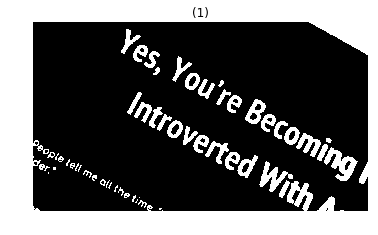

In [55]:
def Negative(img):
    newimg=np.copy(img)
    for x in range(0,img.shape[0]):
        for y in range(0,img.shape[1]):
            newimg[x][y]=1-img[x][y]
    return newimg

my_final_img = Negative(my_final)
print(np.max(my_final_img))
io.imsave("Captured_images/original2_thresholded.jpeg",my_final_img)
show_images([my_final_img])


# Text detection and Orientation Experiments

Here
here2


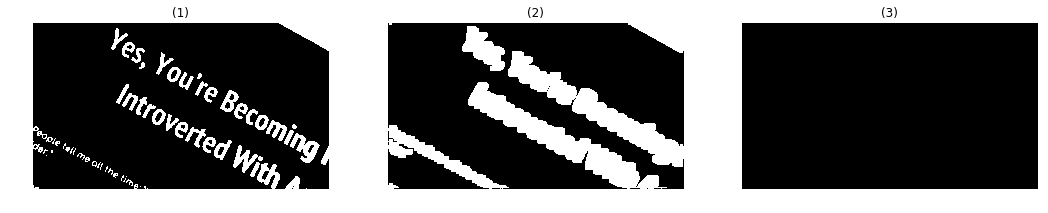

In [56]:
from skimage.measure import find_contours
from skimage.draw import rectangle
def erosion(img,struc):
    output_image = np.copy(img)
    edgex = math.floor(struc.shape[0] /2 )
    edgey = math.floor(struc.shape[1] /2 )

    #colorArray = struc
    for x in range(edgex,img.shape[0]-edgex):
        for y in range(edgey,img.shape[1]-edgey):
            colorArray = np.zeros((struc.shape[0],struc.shape[1]))
            for fx in range(0,struc.shape[0]):
                for fy in range(0,struc.shape[1]):
                    if struc[fx][fy] == 1:
                        colorArray[fx][fy] = img[x+fx-edgex][y+fy-edgey]
                    else : 
                        colorArray[fx][fy] = 1
            colorArray.sort(axis=0)
            output_image[x][y] = np.amin(colorArray)

    return output_image


def dilation(img,struc):
    output_image = np.copy(img)
    edgex = math.floor(struc.shape[0] /2 )
    edgey = math.floor(struc.shape[1] /2 )

    #colorArray = struc
    for x in range(edgex,img.shape[0]-edgex):
        for y in range(edgey,img.shape[1]-edgey):
            colorArray = np.zeros((struc.shape[0],struc.shape[1]))
            for fx in range(0,struc.shape[0]):
                for fy in range(0,struc.shape[1]):
                    if struc[fx][fy] == 1:
                        colorArray[fx][fy] = img[x+fx-edgex][y+fy-edgey]
                    else : 
                        colorArray[fx][fy] = 0
            colorArray.sort(axis=0)
            output_image[x][y] = np.amax(colorArray)

    return output_image

def closing(img,struc):
    temp = np.copy(img)
    di_img = dilation(temp,struc)
    output = erosion(di_img,struc)
    return output
    
struc = np.array([
        [ 1,1,1,1,1,1,1,1,1,1,1,1],
        [ 1,1,1,1,1,1,1,1,1,1,1,1],
        [ 1,1,1,1,1,1,1,1,1,1,1,1],
        [ 1,1,1,1,1,1,1,1,1,1,1,1],
        [ 1,1,1,1,1,1,1,1,1,1,1,1],
        [ 1,1,1,1,1,1,1,1,1,1,1,1]
    ])
      

struc2 = np.array([
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1]
        
    ])    
    
#closing_img = closing(my_final_img,struc)
dilation_img = dilation(my_final_img,struc)
dilation_img = dilation(dilation_img,struc)
dilation_img = dilation(dilation_img,struc)

#list1 = find_contours(closing_img,0.8)
print("Here")
#print(list1)

#temp_list = []
#for contour in list1:
#    temp_contour_ = []
#    y_list = contour[:,0]
#    x_list = contour[:,1]
    
#    xmin  = min(x_list)
#    ymin = min(y_list)
#    xmax = max(x_list) 
#    ymax = max(y_list)
#    temp_contour = math.floor(xmin), math.floor(xmax), math.floor(ymin), math.floor(ymax)
    
#    temp_list.append(temp_contour)
        
img_with_boxes = np.zeros((my_final_img.shape[0],my_final_img.shape[1]))
#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
print("here2")
#for box in temp_list:
#    [Xmin, Xmax, Ymin, Ymax] = box
#    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=my_final_img.shape)
 #   img_with_boxes[rr, cc] = 1 #set color white



show_images([my_final_img,dilation_img,img_with_boxes]) #

# Hough transform experiments

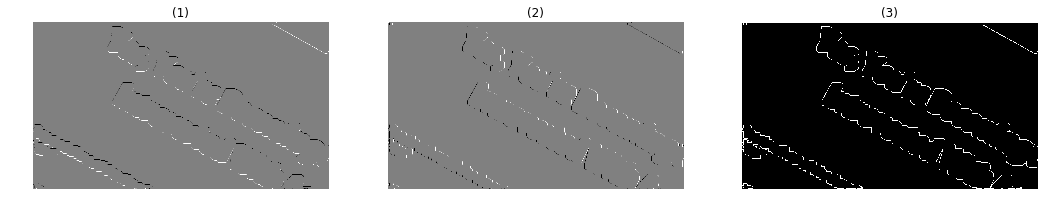

In [61]:
def sobel_imp(image,threshold):
    output_x = np.copy(image)
    output_y = np.copy(image)
    output = np.copy(image)
    
    f1 = np.array([
        [ -1,0,1],
        [ -2,0,2],
        [ -1,0,1]
    ])
    f2 = np.array([
        [ -1,-2,-1],
        [ 0,0,0],
        [ 1,2,1]
    ])
    
    output_x = convolve2d(image,f2)
    output_y = convolve2d(image,f1)
    
    
    for x in range(0,image.shape[0]):
        for y in range(0,image.shape[1]):
            output[x][y] = np.sqrt(((output_x[x][y]**2)+(output_y[x][y]**2)))
            if output[x][y] > threshold:
                output[x][y] = 255
            else :
                output[x][y] = 0
                
    show_images([output_x,output_y,output])
    return output
good_sobel = sobel_imp(dilation_img,0.6)

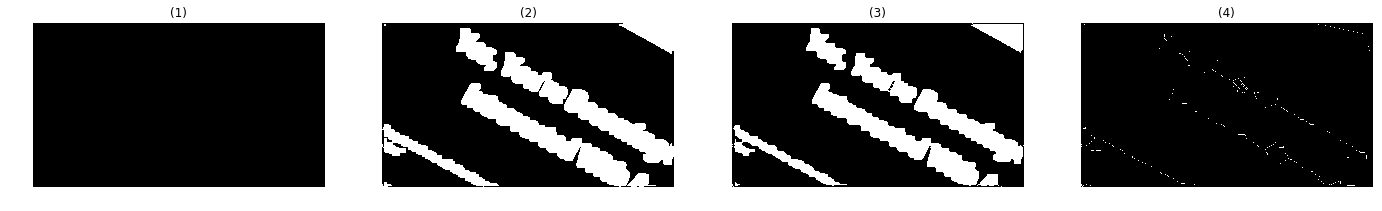

In [62]:
struc1 = np.array([
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1],
        [ 1,1,1,1]
    ])  
edged_image = canny(dilation_img)
erosion_image = erosion(dilation_img,struc1)
skeleton = skeletonize(dilation_img)
thin_image = thin(dilation_img,5)
show_images([edged_image,erosion_image,thin_image,skeleton])

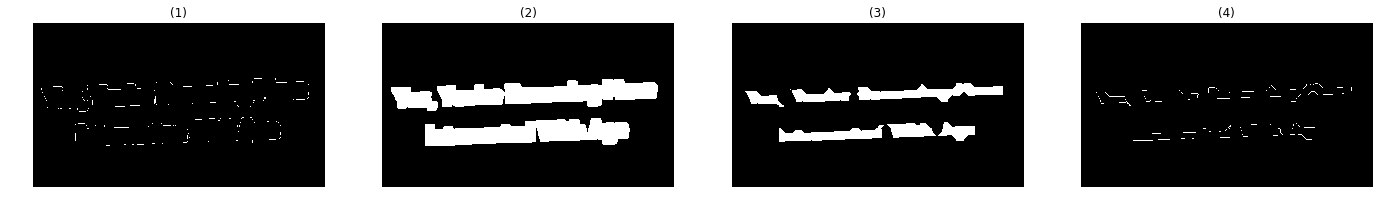

In [18]:
thin_image = thin(dilation_img,20)
canny2 = canny(thin_image)
show_images([edged_image,erosion_image,thin_image,canny2])

In [ ]:
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 

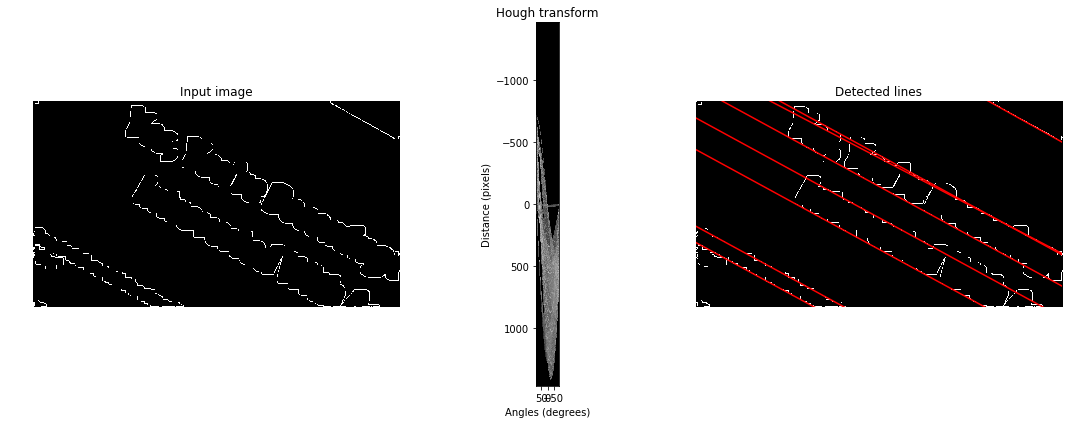

In [79]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

def hough(temp_image):
    # Constructing test image
    image = temp_image

    # Classic straight-line Hough transform
    # Set a precision of 0.5 degree.
    tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
    h, theta, d = hough_line(image, theta=tested_angles)
    # Generating figure 1
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(np.log(1 + h),
                 extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
                 cmap=cm.gray, aspect=1/1.5)
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    ax[2].imshow(image, cmap=cm.gray)
    origin = np.array((0, image.shape[1]))
    _, angle, dist = hough_line_peaks(h, theta, d)
    list_of_angles = []
    #print(list_of_angles)
    for i in range(0,len(angle)):
        list_of_angles.append(float("{0:.1f}".format(angle[i])))
    final_angle = most_frequent(list_of_angles)
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        if float("{0:.1f}".format(angle)) == final_angle:
            y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
            #print(y0,y1)
            ax[2].plot(origin, (y0, y1), '-r')
            #print("slope", (y1-origin[1]) / (y0-origin[0]))
    ax[2].set_xlim(origin)
    ax[2].set_ylim((image.shape[0], 0))
    ax[2].set_axis_off()
    ax[2].set_title('Detected lines')


    plt.tight_layout()
    plt.show()
    
hough(good_sobel)

In [64]:
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 

final_angle = most_frequent(list(list_of_angles))
print(np.rad2deg(final_angle))



-61.420612813370475


# Modify the orientation by given rotation angle

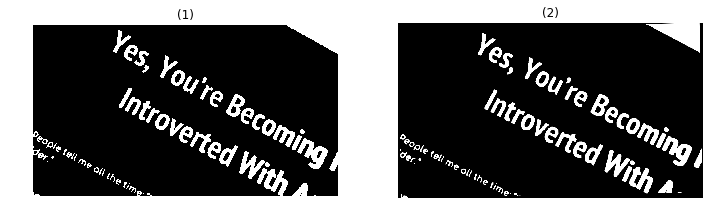

In [65]:
import math
from skimage.transform import rotate
rotation_anlge = final_angle#math.degrees(math.atan(final_angle))
rotated_image = rotate(my_final_img, -1*rotation_anlge, resize=True)
show_images([my_final_img,rotated_image])

# All the past was experiments.. Here is the core code
===================================================================================================================


# final Functions here

# Main Program 


Enter name of the input image: 8.jpeg


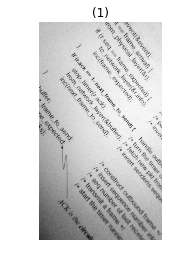

0.8117647058823529


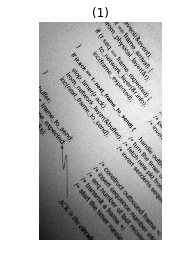

43.0


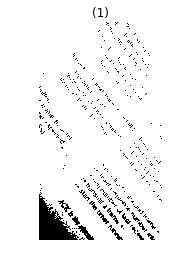

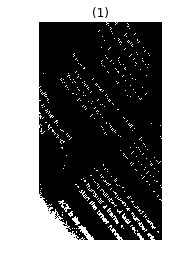

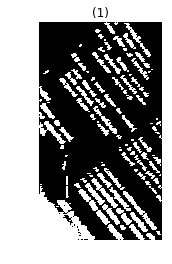

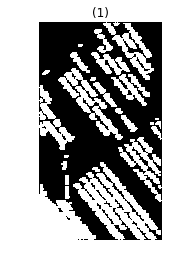

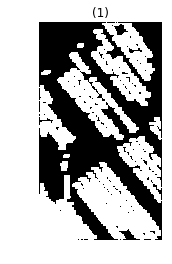

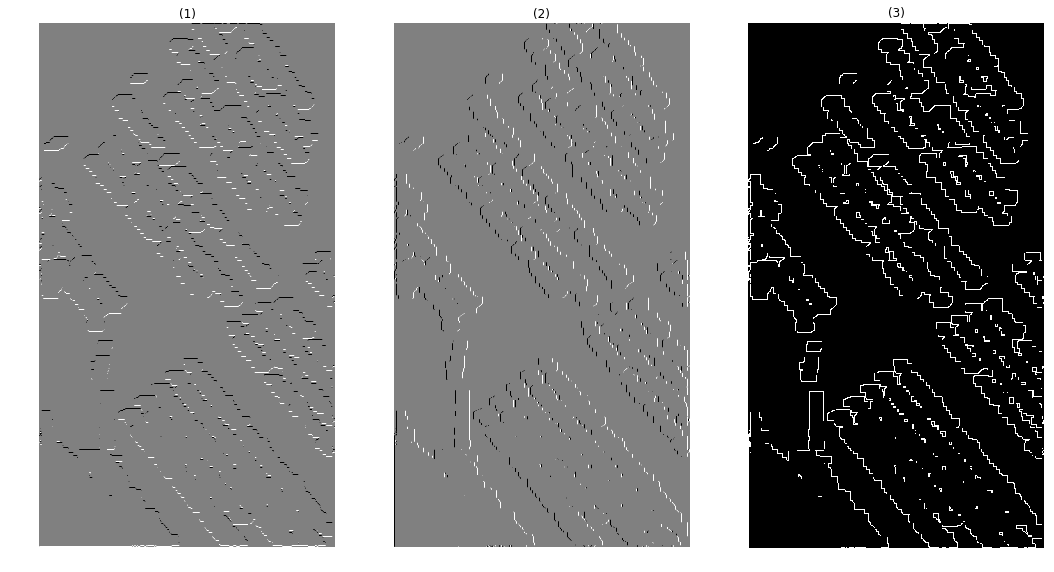

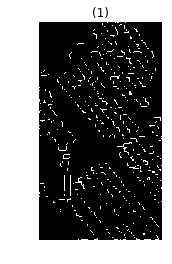

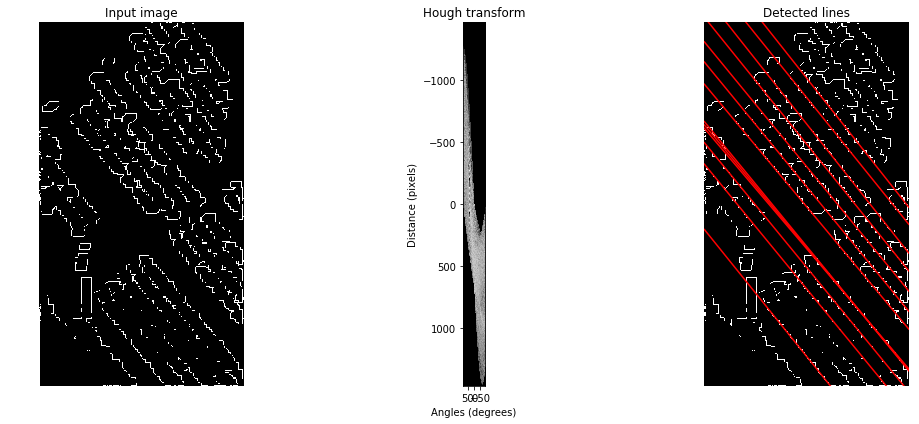

Enter name of the output image: 2_correct.jpeg


In [81]:
input_name = input("Enter name of the input image: ")
input_path  = "test_cases/" + input_name
gray_scale_image = np.array((rgb2gray(io.imread(input_path)) * 255).astype(np.uint8))
gray_scale_image = gray_scale_image / 255
show_images([gray_scale_image])
print(np.max(gray_scale_image))
gamma_correction_transform = gamma_correction(gray_scale_image,1,3)
show_images([gamma_correction_transform])
my_final = transform(gamma_correction_transform)
show_images([my_final])
my_final_img = Negative(my_final)
show_images([my_final_img])
dilation_img = dilation(my_final_img,struc)
show_images([dilation_img])
dilation_img = dilation(dilation_img,struc)
show_images([dilation_img])
dilation_img = dilation(dilation_img,struc)
show_images([dilation_img])
edged_sobel = sobel_imp(dilation_img,0.5) # return image from 0-255
show_images([edged_sobel])
hough(edged_sobel)
output_name = input("Enter name of the output image: ")
output_path = "test_cases/" + output_name
io.imsave(output_path,edged_sobel)

# This part of code of (enhancement and thresholding) is basicly done. It's need improvement ofcourse. But It's work in the (best+Intermiediate base scenario). Improvement s are the following:
1. The Intensity of the Input must be unified so thresholding and enhancement works correctly in any case(JPG, PNG)
2. Removing noise and smoothing quite
3. thresholding (using partitioning to find local thresholding is false thinking). thresholding should be on RGB channel for very accurate result. No the partioning is good thinking and will lead to good results. and we can't relay on RGB to detect black text as the text can be colored
4. (discussion point). Partitioning is good. But for great accuracy we can't relay on grayscale. We need to use RGB for getting an accurate background.

In [75]:
input_name = input("Enter name of the input image: ")
#output_name = input("Enter name of the output image: ")
input_path  = "Captured_images/" + input_name
#output_path = "Captured_images/" + output_name
gray_scale_image = np.array((rgb2gray(io.imread(input_path)) * 255).astype(np.uint8))

gray_scale_image = gray_scale_image / 255
print(np.max(gray_scale_image))

Enter name of the input image: oo_original.jpeg
202.0
